In [142]:
pip install pandas-datareader

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# General applications of python for finance

In [3]:
# pandas datareader imports API
# datetime for financial time series

import pandas as pd
import pandas_datareader as pdr
import datetime 

In [130]:
# Extract data for ticker AAPL

aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2008, 10, 1), 
                          end=datetime.datetime(2020, 1, 1))
type(aapl)

pandas.core.frame.DataFrame

## Exploratory statistics



In [14]:

aapl.head()
aapl.tail()
aapl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2832.000000,2832.000000,2832.000000,2832.000000,2.832000e+03,2832.000000
mean,25.271048,24.815181,25.045257,25.051382,3.468538e+08,23.383196
std,15.163168,14.925216,15.036198,15.054018,2.944552e+08,15.086571
min,2.928571,2.792857,2.835357,2.792857,4.544800e+07,2.409260
25%,13.300269,12.857768,13.033482,13.063124,1.321902e+08,11.268911
50%,23.456249,23.025000,23.250000,23.289642,2.619312e+08,20.732148
75%,34.966875,34.691874,34.815625,34.846250,4.591349e+08,33.145433
max,73.492500,72.379997,72.779999,73.412498,2.294398e+09,72.783936


In [17]:
# Convert the data stream into a csv file 

aapl.to_csv('Desktop/aapl_ohlc.csv')

#attach it as df saved on local source

df = pd.read_csv('Desktop/aapl_ohlc.csv', header=0, index_col='Date', parse_dates=True)



In [131]:
# Explore index and columns as df attributes

df.index
df.columns
df.shape


(2832, 7)

In [132]:
# Extract Close values for the first 10 days

ts = df['Close'][:10]

# we subset the df aapl into a column series ts

ts

Date
2008-10-01    3.897143
2008-10-02    3.575000
2008-10-03    3.466786
2008-10-06    3.505000
2008-10-07    3.184286
2008-10-08    3.206786
2008-10-09    3.169286
2008-10-10    3.457143
2008-10-13    3.937857
2008-10-14    3.717143
Name: Close, dtype: float64

In [29]:
type(ts)

pandas.core.series.Series

In [30]:
# Inspect the first rows of November-December 2008 'By Timestamp ROWS'
# subset by pd.Timestamp

print(df.loc[pd.Timestamp('2008-11-01'): pd.Timestamp('2008-12-01')])

                High       Low      Open     Close        Volume  Adj Close
Date                                                                       
2008-11-03  3.896429  3.745000  3.783214  3.820000  1.057938e+09   3.295326
2008-11-04  3.992500  3.809643  3.928214  3.963929  1.398681e+09   3.419486
2008-11-05  3.918571  3.678214  3.889643  3.689286  1.256455e+09   3.182565
2008-11-06  3.670714  3.500000  3.608929  3.539286  1.319074e+09   3.053167
2008-11-07  3.566071  3.418571  3.544286  3.508571  1.095254e+09   3.026671
2008-11-10  3.585714  3.375000  3.577500  3.424286  1.123822e+09   2.953962
2008-11-11  3.470357  3.295000  3.386071  3.384643  1.224538e+09   2.919765
2008-11-12  3.330000  3.214643  3.301071  3.218571  1.178976e+09   2.776502
2008-11-13  3.444286  3.072143  3.209643  3.444286  1.854087e+09   2.971215
2008-11-14  3.356786  3.214286  3.348571  3.222857  1.405267e+09   2.780200
2008-11-17  3.233929  3.116429  3.160000  3.147857  1.162526e+09   2.715501
2008-11-18  

In [52]:
# Inspect the first rows of 2009
# Extract a subet DataFrame ts1 from aapl
ts1 = df.loc['2009']
print(ts1)
type(ts1)

                High       Low      Open     Close        Volume  Adj Close
Date                                                                       
2009-01-02  3.251429  3.041429  3.067143  3.241071  7.460152e+08   2.795912
2009-01-05  3.435000  3.311071  3.327500  3.377857  1.181608e+09   2.913911
2009-01-06  3.470357  3.299643  3.426786  3.322143  1.289310e+09   2.865849
2009-01-07  3.303571  3.223571  3.278929  3.250357  7.530488e+08   2.803922
2009-01-08  3.326786  3.215714  3.229643  3.310714  6.735008e+08   2.855989
...              ...       ...       ...       ...           ...        ...
2009-12-24  7.476786  7.262500  7.269643  7.465714  5.008892e+08   6.440303
2009-12-28  7.641071  7.486071  7.561429  7.557500  6.445656e+08   6.519482
2009-12-29  7.597143  7.454643  7.593929  7.467857  4.452056e+08   6.442152
2009-12-30  7.571429  7.439643  7.458214  7.558571  4.120844e+08   6.520405
2009-12-31  7.619643  7.520000  7.611786  7.526071  3.524108e+08   6.492369

[252 rows x

pandas.core.frame.DataFrame

In [44]:
# Inspect November 2008
# By inddexing rows (22 trading days a month)

print(df.iloc[21:43])


                High       Low      Open     Close        Volume  Adj Close
Date                                                                       
2008-10-30  4.006786  3.843214  3.865357  3.965714  1.638090e+09   3.421026
2008-10-31  3.956429  3.755000  3.835714  3.842500  1.659756e+09   3.314735
2008-11-03  3.896429  3.745000  3.783214  3.820000  1.057938e+09   3.295326
2008-11-04  3.992500  3.809643  3.928214  3.963929  1.398681e+09   3.419486
2008-11-05  3.918571  3.678214  3.889643  3.689286  1.256455e+09   3.182565
2008-11-06  3.670714  3.500000  3.608929  3.539286  1.319074e+09   3.053167
2008-11-07  3.566071  3.418571  3.544286  3.508571  1.095254e+09   3.026671
2008-11-10  3.585714  3.375000  3.577500  3.424286  1.123822e+09   2.953962
2008-11-11  3.470357  3.295000  3.386071  3.384643  1.224538e+09   2.919765
2008-11-12  3.330000  3.214643  3.301071  3.218571  1.178976e+09   2.776502
2008-11-13  3.444286  3.072143  3.209643  3.444286  1.854087e+09   2.971215
2008-11-14  

## Further exploration



In [54]:
# Sampling and Resampling
# Sample 20 rows

sample = df.sample(20)
print(sample)

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2016-10-05  28.415001  28.172501  28.350000  28.262501   85812400.0  26.630255
2011-06-06  12.394643  12.064643  12.346429  12.072857  461941200.0  10.414658
2009-07-29   5.730357   5.651786   5.675000   5.715357  382158000.0   4.930357
2017-09-20  39.564999  38.457500  39.474998  39.017502  211805600.0  37.412628
2014-05-27  22.352142  21.986786  21.995714  22.343929  348866000.0  20.166027
2019-11-13  66.195000  65.267502  65.282501  66.117500  102734400.0  65.551399
2015-08-28  28.327499  27.885000  28.042500  28.322500  212657600.0  26.128145
2009-01-02   3.251429   3.041429   3.067143   3.241071  746015200.0   2.795912
2014-07-31  24.362499  23.832500  24.290001  23.900000  227372000.0  21.570419
2011-01-25  12.194286  11.948929  12.011786  12.192857  546868000.0  10.518175
2019-09-26  55.235001  54.707500  55.000000  54.9725

In [49]:
# Inspect the 'Open' and 'Close' values at 2008-11-01 and 2008-12-01

print(df.iloc[[23,43],[2,3]])

                Open   Close
Date                        
2008-11-03  3.783214  3.8200
2008-12-02  3.215357  3.3025


In [58]:
monthly_df = df.resample('M').mean()
print(monthly_df)

                 High        Low       Open      Close        Volume  \
Date                                                                   
2008-10-31   3.705637   3.372904   3.560994   3.535854  1.801161e+09   
2008-11-30   3.454286   3.261673   3.374718   3.355019  1.243130e+09   
2008-12-31   3.336883   3.190795   3.260844   3.269416  9.188112e+08   
2009-01-31   3.232375   3.110268   3.166607   3.170536  9.052870e+08   
2009-02-28   3.424737   3.296391   3.346109   3.359793  7.298658e+08   
...               ...        ...        ...        ...           ...   
2019-08-31  51.902386  50.712386  51.315568  51.239432  1.238330e+08   
2019-09-30  54.867750  53.984875  54.431875  54.498750  1.085134e+08   
2019-10-31  59.242283  58.236304  58.732391  58.821630  1.057918e+08   
2019-11-30  65.865375  65.060500  65.423499  65.630126  8.966630e+07   
2019-12-31  69.470952  68.467024  68.847857  69.131428  1.137521e+08   

            Adj Close  
Date                   
2008-10-31   3.

In [62]:
# Add a column `diff` to `df` 
df['diff']= df['Open'] - df['Close']
df
#del df['diff']

,High,Low,Open,Close,Volume,Adj Close,diff
Date,,,,,,,
2008-10-01,4.012857,3.835357,3.997143,3.897143,1.296484e+09,3.361873,0.100000
2008-10-02,3.885357,3.571429,3.857500,3.575000,1.609364e+09,3.083976,0.282500
2008-10-03,3.803571,3.380357,3.714286,3.466786,2.294398e+09,2.990625,0.247500
2008-10-06,3.527857,3.126429,3.284286,3.505000,2.107417e+09,3.023591,-0.220714
2008-10-07,3.625000,3.176786,3.588571,3.184286,1.878772e+09,2.746926,0.404285
...,...,...,...,...,...,...,...
2019-12-24,71.222504,70.730003,71.172501,71.067497,4.847880e+07,70.459007,0.105003
2019-12-26,72.495003,71.175003,71.205002,72.477501,9.312120e+07,71.856941,-1.272499
2019-12-27,73.492500,72.029999,72.779999,72.449997,1.462660e+08,71.829674,0.330002


In [67]:
###df['PctChange']= ((df['Open']- df['Close'] / df['Close']) * 100 )
del df['PctChange']

## Visual Analysis

In [69]:
import matplotlib.pyplot as plt

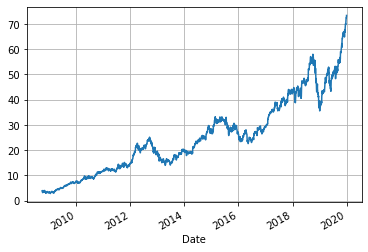

In [75]:
# Plot the closing prices for `df`
df['Close'].plot(grid = True)
plt.show()

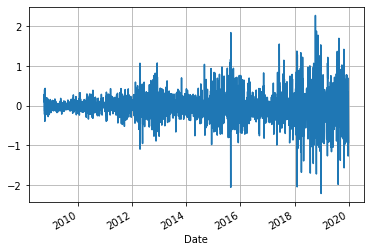

In [74]:
# Plot the diff column
df['diff'].plot(grid = True)
plt.show()

In [77]:
# Calculating daily returns
import numpy as np
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'diff'], dtype='object')

In [83]:
# Assign `Adj Close` to `daily_close`
daily_close = df['Adj Close']

# Daily returns
D_PctChange = daily_close.pct_change()

# Replace NA values with 0
D_PctChange.fillna(0, inplace=True)

# Inspection
print(D_PctChange)



Date
2008-10-01    0.000000
2008-10-02   -0.082661
2008-10-03   -0.030270
2008-10-06    0.011023
2008-10-07   -0.091502
                ...   
2019-12-24    0.000951
2019-12-26    0.019840
2019-12-27   -0.000379
2019-12-30    0.005935
2019-12-31    0.007307
Name: Adj Close, Length: 2832, dtype: float64


In [91]:
# Daily log returns to get better insight on growth overtime
daily_log_returns = np.log(daily_close.pct_change()+1)

In [94]:
print(daily_log_returns)

Date
2008-10-01         NaN
2008-10-02   -0.086279
2008-10-03   -0.030737
2008-10-06    0.010963
2008-10-07   -0.095963
                ...   
2019-12-24    0.000950
2019-12-26    0.019646
2019-12-27   -0.000380
2019-12-30    0.005918
2019-12-31    0.007280
Name: Adj Close, Length: 2832, dtype: float64


In [141]:
# Resample `df` to business months, take last observation as value 

monthly = df.resample('BM').apply(lambda x: x[-1])
type(monthly)

# Calculate the monthly percentage change
monthly.pct_change()

                            

,High,Low,Open,Close,Volume,Adj Close,diff
Date,,,,,,,
2008-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-28,-0.144611,-0.126308,-0.118249,-0.138675,-0.820591,-0.138675,-11.683965
2008-12-31,-0.074082,-0.070978,-0.092186,-0.078990,1.040273,-0.078990,-0.694578
2009-01-30,0.067016,0.054722,0.077120,0.056005,0.072320,0.056005,2.983806
2009-02-27,-0.024781,-0.025997,-0.050432,-0.009098,0.084699,-0.009098,-1.558709
...,...,...,...,...,...,...,...
2019-08-30,-0.049329,-0.019404,-0.028925,-0.020184,-0.694819,-0.016461,-0.579883
2019-09-30,0.067142,0.065589,0.051104,0.072962,0.228629,0.072961,-3.161980
2019-10-31,0.109493,0.074596,0.119240,0.110684,0.339260,0.110684,-0.504891


In [96]:
# Resample `df` to quarters, take the mean as value per quarter
quarter = df.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()


,High,Low,Open,Close,Volume,Adj Close,diff
Date,,,,,,,
2008-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-02-28,-0.093407,-0.047534,-0.077623,-0.070524,-0.473905,-0.070524,-1.076003
2009-06-30,0.304359,0.324702,0.312134,0.316588,-0.386935,0.316588,7.972125
2009-10-31,0.411193,0.425117,0.421239,0.415901,-0.158270,0.415901,-0.926119
2010-02-28,0.176085,0.172864,0.175612,0.173693,0.170633,0.173693,-9.107152
2010-06-30,0.223317,0.219063,0.223045,0.223611,0.203680,0.223611,-0.173317
2010-10-31,0.094268,0.099356,0.094380,0.096125,-0.157478,0.096125,-1.714279
2011-02-28,0.218082,0.225622,0.221393,0.221858,-0.230726,0.221858,0.959679
2011-06-30,0.033863,0.031616,0.034143,0.031222,-0.043455,0.031222,-2.863288


In [97]:
# Calculate pct change using the shift back method
# Daily returns
daily_pct_change = daily_close / daily_close.shift(1) - 1 # so handy for iterative process

# Print `daily_pct_change`
print(daily_pct_change)

Date
2008-10-01         NaN
2008-10-02   -0.082661
2008-10-03   -0.030270
2008-10-06    0.011023
2008-10-07   -0.091502
                ...   
2019-12-24    0.000951
2019-12-26    0.019840
2019-12-27   -0.000379
2019-12-30    0.005935
2019-12-31    0.007307
Name: Adj Close, Length: 2832, dtype: float64


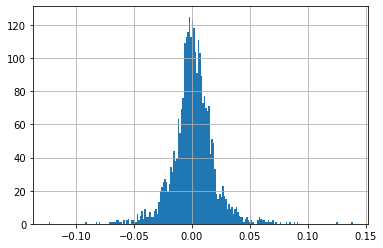

In [99]:
# Plot the distribution of `daily_pct_change`
D_PctChange.hist(bins=200)
plt.show()

In [100]:
print(D_PctChange.describe())

count    2832.000000
mean        0.001250
std         0.018099
min        -0.123558
25%        -0.007140
50%         0.001008
75%         0.010409
max         0.139050
Name: Adj Close, dtype: float64


In [103]:
# Calculate the cumulative daily returns

cum_daily_return = (1 + D_PctChange ).cumprod()
print(cum_daily_returns)

Date
2008-10-01     1.000000
2008-10-02     0.917339
2008-10-03     0.889571
2008-10-06     0.899377
2008-10-07     0.817082
                ...    
2019-12-24    20.958260
2019-12-26    21.374080
2019-12-27    21.365969
2019-12-30    21.492781
2019-12-31    21.649818
Name: Adj Close, Length: 2832, dtype: float64


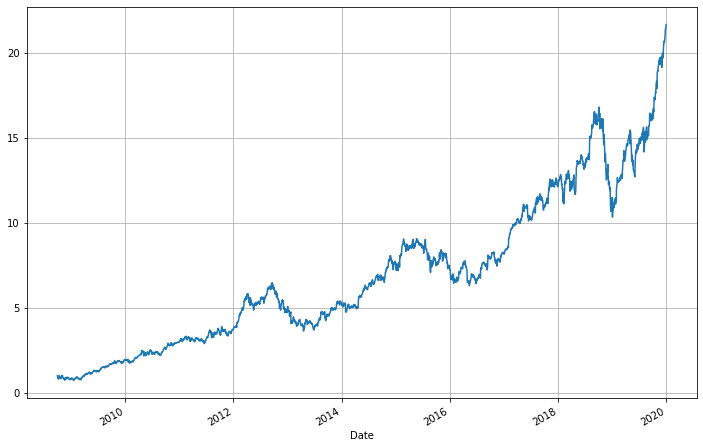

In [105]:
# Plot the cumulative daily returns WOW!
cum_daily_return.plot(figsize=(12,8), grid =True)

# Show the plot
plt.show()

In [106]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

Date
2008-10-31     0.907294
2008-11-30     0.860892
2008-12-31     0.838926
2009-01-31     0.813554
2009-02-28     0.862117
                ...    
2019-08-31    15.050364
2019-09-30    16.023923
2019-10-31    17.294953
2019-11-30    19.343406
2019-12-31    20.387302
Freq: M, Name: Adj Close, Length: 135, dtype: float64


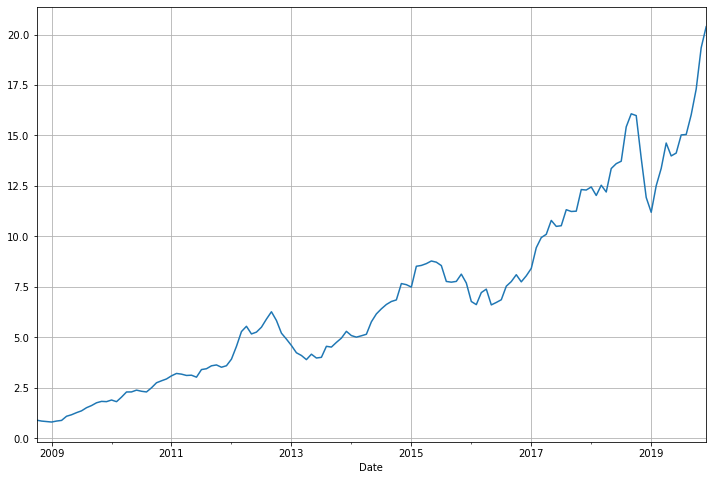

In [107]:
# Plot the cumulative monthly returns WOW!
cum_monthly_return.plot(figsize=(12,8), grid =True)

# Show the plot
plt.show()

### New section

In [111]:
'{Get more data from Yahoo! Finance first'

   
def get(tickers, startdate, enddate) :
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start = startdate, end = enddate))
    datas = map(data,tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2008, 10, 1),
               datetime.datetime(2020, 1, 1))

In [112]:
all_data

High          Low         Open        Close  \
Ticker Date                                                             
AAPL   2008-10-01     4.012857     3.835357     3.997143     3.897143   
       2008-10-02     3.885357     3.571429     3.857500     3.575000   
       2008-10-03     3.803571     3.380357     3.714286     3.466786   
       2008-10-06     3.527857     3.126429     3.284286     3.505000   
       2008-10-07     3.625000     3.176786     3.588571     3.184286   
...                        ...          ...          ...          ...   
GOOG   2019-12-24  1350.260010  1342.780029  1348.500000  1343.560059   
       2019-12-26  1361.327026  1344.469971  1346.170044  1360.400024   
       2019-12-27  1364.530029  1349.310059  1362.989990  1351.890015   
       2019-12-30  1353.000000  1334.020020  1350.000000  1336.140015   
       2019-12-31  1338.000000  1329.084961  1330.109985  1337.020020   

                         Volume    Adj Close  
Ticker Date                                   
AAPL   2008-10-01  1.296484e+09     3.361873  
       2008-10-02  1.609364e+09     3.083976  
       2008-10-03  2.294398e+09     2.990625  
       2008-10-06  2.107417e+09     3.023591  
       2008-10-07  1.878772e+09     2.746926  
...                         ...          ...  
GOOG   2019-12-24  3.475000e+05  1343.560059  
       2019-12-26  6.675000e+05  1360.400024  
       2019-12-27  1.038400e+06  1351.890015  
       2019-12-30  1.050900e+06  1336.140015  
       2019-12-31  9.618000e+05  1337.020020  

[11328 rows x 6 columns]

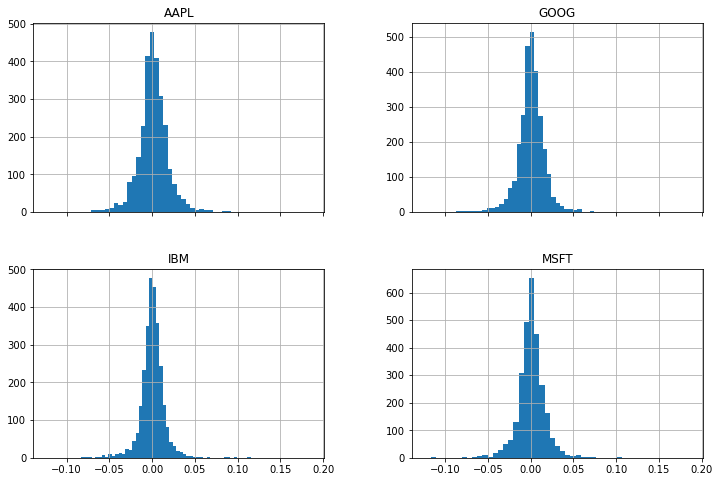

In [123]:
# Isolate the `Adj Close` values and transform the DataFrame

daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions (sharex for multigraphs)
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))
plt.show()

In [134]:
type(daily_close_px)
daily_close_px

Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,
2008-10-01,3.361873,205.091263,76.013306,20.015720
2008-10-02,3.083976,194.515900,72.293068,19.841873
2008-10-03,2.990625,192.732590,71.395782,19.894783
2008-10-06,3.023591,184.911911,69.449387,18.828989
2008-10-07,2.746926,172.358963,66.018974,17.559111
...,...,...,...,...
2019-12-24,70.459007,1343.560059,128.253876,155.730255
2019-12-26,71.856941,1360.400024,128.187378,157.006729
2019-12-27,71.829674,1351.890015,128.529419,157.293686


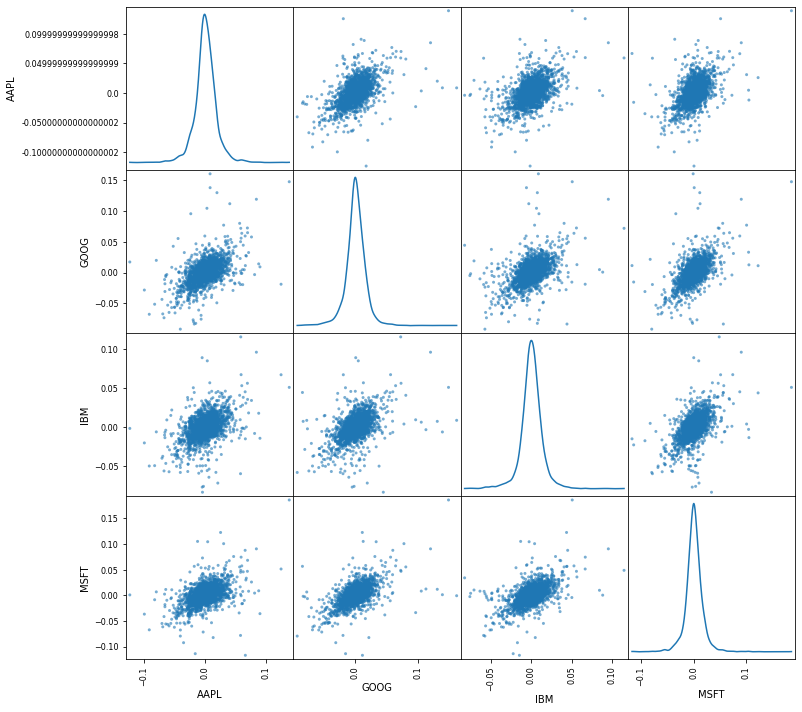

In [128]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal ='kde',alpha = 0.6, figsize=(12,12))
plt.show()

# the Kernel Density Estimate plot estimates the probability density function of a random variable.



## Moving Windows / Eras

Date
2019-12-17    52.869380
2019-12-18    53.002067
2019-12-19    53.137577
2019-12-20    53.271866
2019-12-23    53.404461
2019-12-24    53.534927
2019-12-26    53.671400
2019-12-27    53.805261
2019-12-30    53.938323
2019-12-31    54.071694
Name: Adj Close, dtype: float64
Date
2008-10-01         NaN
2008-10-02         NaN
2008-10-03         NaN
2008-10-06         NaN
2008-10-07         NaN
                ...   
2019-12-24    7.172598
2019-12-26    7.260150
2019-12-27    7.346824
2019-12-30    7.438682
2019-12-31    7.536103
Name: Adj Close, Length: 2832, dtype: float64


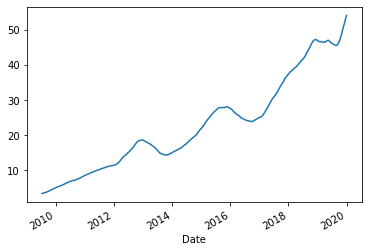

In [157]:
# Isolate the adjusted closing prices 
adj_close_px = df['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(200).mean()
moving_avg_std = adj_close_px.rolling(200).std()


# Inspect the result

print(moving_avg[-10:])

print(moving_avg_std)
moving_avg.plot()


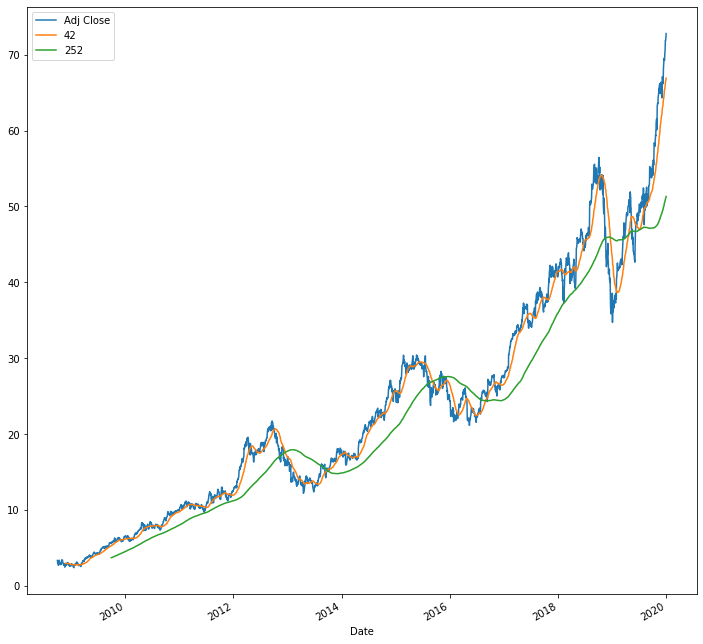

In [162]:
# Short moving window rolling mean
df['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
df['252'] = adj_close_px.rolling(window=252).mean()


# Plot the adjusted closing price, the short and long windows of rolling means
df[['Adj Close', '42', '252']].plot(figsize=(12,12))
plt.show()

## volatility calculation

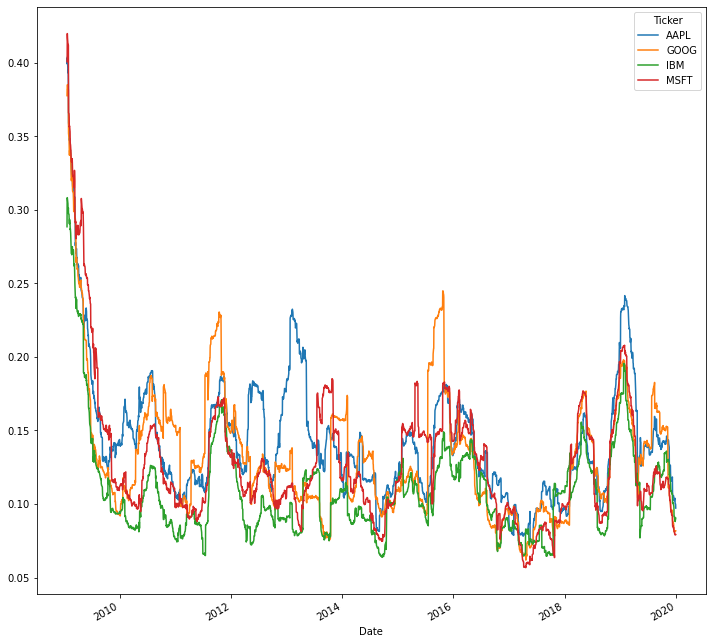

In [164]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(12, 12))

# Show the plot
plt.show()

## OLS

In [165]:
# Import the `api` model of `statsmodels` under alias `sm
import statsmodels.api as sm


# Import the `datetools` module from `pandas`
from pandas.core import datetools



In [166]:
# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

In [168]:
# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

In [167]:
# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))
print(all_returns)

                   Adj Close
Ticker Date                 
AAPL   2008-10-01        NaN
       2008-10-02  -0.086279
       2008-10-03  -0.030737
       2008-10-06   0.010963
       2008-10-07  -0.095963
...                      ...
GOOG   2019-12-24  -0.003922
       2019-12-26   0.012456
       2019-12-27  -0.006275
       2019-12-30  -0.011719
       2019-12-31   0.000658

[11328 rows x 1 columns]


In [174]:
all_returns.index

MultiIndex([('AAPL', '2008-10-01'),
            ('AAPL', '2008-10-02'),
            ('AAPL', '2008-10-03'),
            ('AAPL', '2008-10-06'),
            ('AAPL', '2008-10-07'),
            ('AAPL', '2008-10-08'),
            ('AAPL', '2008-10-09'),
            ('AAPL', '2008-10-10'),
            ('AAPL', '2008-10-13'),
            ('AAPL', '2008-10-14'),
            ...
            ('GOOG', '2019-12-17'),
            ('GOOG', '2019-12-18'),
            ('GOOG', '2019-12-19'),
            ('GOOG', '2019-12-20'),
            ('GOOG', '2019-12-23'),
            ('GOOG', '2019-12-24'),
            ('GOOG', '2019-12-26'),
            ('GOOG', '2019-12-27'),
            ('GOOG', '2019-12-30'),
            ('GOOG', '2019-12-31')],
           names=['Ticker', 'Date'], length=11328)

In [180]:
# Build up a new Dataframe with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis =1)[1:]
return_data.columns = ['AAPL', 'MSFT']

return_data

# Note that you add [1:] to the concatenation of the AAPL and MSFT return data so that you don’t have any NaN values that can interfere with your model.

# Add a constant (convert series to Dataframe to be accepted in OLS)
X = sm.add_constant(return_data['AAPL'])




pandas.core.series.Series

In [181]:
# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     890.4
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          2.45e-170
Time:                        16:29:11   Log-Likelihood:                 7948.5
No. Observations:                2831   AIC:                        -1.589e+04
Df Residuals:                    2829   BIC:                        -1.588e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.848      0.3

In [182]:
return_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2831 entries, 2008-10-02 to 2019-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2831 non-null   float64
 1   MSFT    2831 non-null   float64
dtypes: float64(2)
memory usage: 66.4 KB


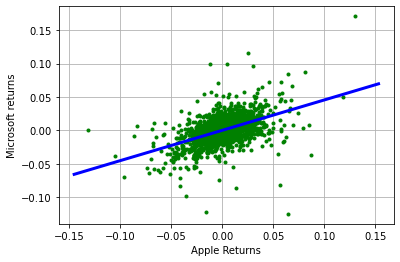

In [201]:
# Plot returns of AAPL and MSFT
plt.plot(return_data['AAPL'], return_data['MSFT'], 'g.')

# Add an axis to the plot
ax = plt.axis()

# Initialize `x`
x = np.linspace(ax[0], ax[1] + 0.01)

# Plot the regression line
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=3)

# Customize the plot
plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

# Show the plot
plt.show()

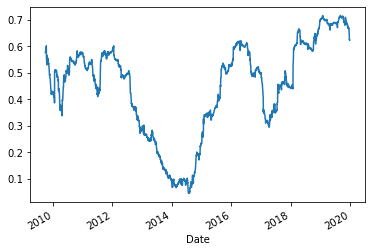

In [184]:
# Plot the rolling correlation
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()

# Show the plot
plt.show()

## Building a trading strategy 

In [ ]:
# Firstly, the momentum strategy (opposing a reversion strategy) is also called divergence or trend trading. 

# you believe that stocks have momentum or upward or downward trends, that you can detect and exploit.

# Some examples of this strategy are the moving average crossover, the dual moving average crossover, and turtle trading:


### moving average cross-over

In [211]:
# Initialize short-term and long-term windows or intervals
short_window = 50
long_window = 200

# Initialize the 'signals' Dataframe with the 'signal' column
signals = pd.DataFrame(index = aapl.index)
signals['signal'] = 0.0

# Create a short SMA over the short window
signals['short_mavg']= aapl['Close'].rolling(window=short_window, min_periods = 1, center = False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Generate signals
# Note that you add the [short_window:] to comply with the condition “only for the period greater than the shortest moving average window
# When the condition is true, the initialized value 0.0 in the signal column will be overwritten with 1.0. A “signal” is created! If the condition is false, the original value of 0.0 will be kept and no signal is generated.
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:],1.0, 0.0)

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print results
print(signals)

            signal  short_mavg  long_mavg  positions
Date                                                
2008-10-01     0.0    3.897143   3.897143        NaN
2008-10-02     0.0    3.736071   3.736071        0.0
2008-10-03     0.0    3.646310   3.646310        0.0
2008-10-06     0.0    3.610982   3.610982        0.0
2008-10-07     0.0    3.525643   3.525643        0.0
...            ...         ...        ...        ...
2019-12-24     1.0   65.160600  54.261513        0.0
2019-12-26     1.0   65.433550  54.396763        0.0
2019-12-27     1.0   65.710700  54.529350        0.0
2019-12-30     1.0   65.991900  54.661100        0.0
2019-12-31     1.0   66.278100  54.793137        0.0

[2832 rows x 4 columns]


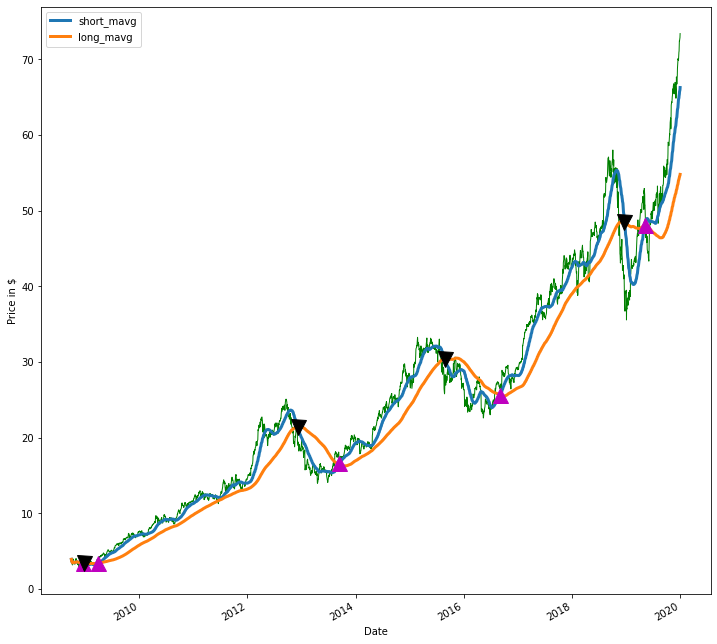

In [224]:
# plot the results

# Initialize plot figure
fig = plt.figure()


# Add a subplot and label for the y-axis
ax1 = fig.add_subplot(111, ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='g', lw=1)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=3,figsize=(12,12))

# Plot the buy signals
ax1.plot(signals.loc[signals.positions ==1.0].index,\
         signals.short_mavg[signals.positions == 1.0],\
         '^', markersize = 15, color='m')

# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index,\
         signals.short_mavg[signals.positions == -1.0],\
         'v', markersize = 15, color='k')

# Show the plot
plt.show()

## Backtesting the trading strategy

In [ ]:
## Backtesting components:
# A data handler, which is an interface to a set of data,\
# A strategy, which generates a signal to go long or go short based on the data,
# A portfolio, which generates orders and manages Profit & Loss (also known as “PnL”), 
# An execution handler, which sends the order to the broker and receives the “fills” or signals that the stock has been bought or sold.

In [231]:
# Set the initial capital
initial_capital = float(100000.0)

# Create a DataFrame 'positions'
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100 * signals['signal']

# Initialize the portfolio with value owned
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned
pos_diff = positions.diff()

# Add 'holdings' to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis = 1)

# Add 'cash' to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'],\
                                                           axis = 0)).sum(axis=1).cumsum()

# Add 'total' to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add returns to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print portfolio
print(portfolio.head())
print(portfolio.tail())

            AAPL  holdings      cash     total  returns
Date                                                   
2008-10-01   0.0       0.0  100000.0  100000.0      NaN
2008-10-02   0.0       0.0  100000.0  100000.0      0.0
2008-10-03   0.0       0.0  100000.0  100000.0      0.0
2008-10-06   0.0       0.0  100000.0  100000.0      0.0
2008-10-07   0.0       0.0  100000.0  100000.0      0.0
                   AAPL     holdings          cash          total   returns
Date                                                                       
2019-12-24  7045.900726  7045.900726  98669.908023  105715.808749  0.000063
2019-12-26  7185.694122  7185.694122  98669.908023  105855.602145  0.001322
2019-12-27  7182.967377  7182.967377  98669.908023  105852.875400 -0.000026
2019-12-30  7225.599670  7225.599670  98669.908023  105895.507693  0.000403
2019-12-31  7278.393555  7278.393555  98669.908023  105948.301578  0.000499


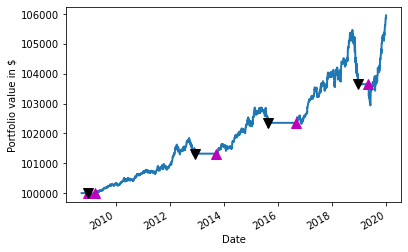

In [232]:
# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel= 'Portfolio value in $')

# Plot the equity curve in dollar
portfolio['total'].plot(ax=ax1, lw=2)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

## Build a simple trading algorithm

In [ ]:
def initialize(context) :
    context.sym = symbol('AAPL')
    context.i = 0
    
def handle_data(context, data) : 
    # skip first 300 days to get full window
    context.i += 1
    if context.i < 200:
        return
    # compute averages
    # history() has to be called with the same params
    # from above and returns a pandas DataFrame.
    short_mavg = data.history(context.sym, 'price', 50, 'id').mean()
    long_mavg = data.history(context.sym, 'price', 200, 'id').mean()
    
    # Trading logic
    if short_mavg > long_mavg :
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.sym, 100)
    elif short_mavg < long_mavg :
        order_target(context.sym, 0)
        
    # save values for later inspections
    record(AAPL=data.current(context.sym, 'price'),
          short_mavg=short_mavg
          long_mavg=long_mavg)

